In [1]:
import sys, time, argparse, re, gensim, math
import pandas as pd
from tqdm import tqdm
import pickle as pkl
import numpy as np
import faulthandler
import logging
from os.path import exists
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import plotly.graph_objects as go
from  sklearn.preprocessing import normalize
from scipy.spatial import distance
from itertools import combinations
from plotly.subplots import make_subplots
import seaborn as sns 
import statistics

In [2]:
def read_file(input_path):
    logging.info('Opened: ' + input_path)
    with open(input_path, "rb") as f:
        input_obj = pkl.load(f)
        return input_obj

In [43]:
PERIODS = ['1700', '1800', '1900', 'full_corpus']
SENSES = ['sight', 'hear', 'touch', 'taste', 'smell']

## Sensory Imbalance

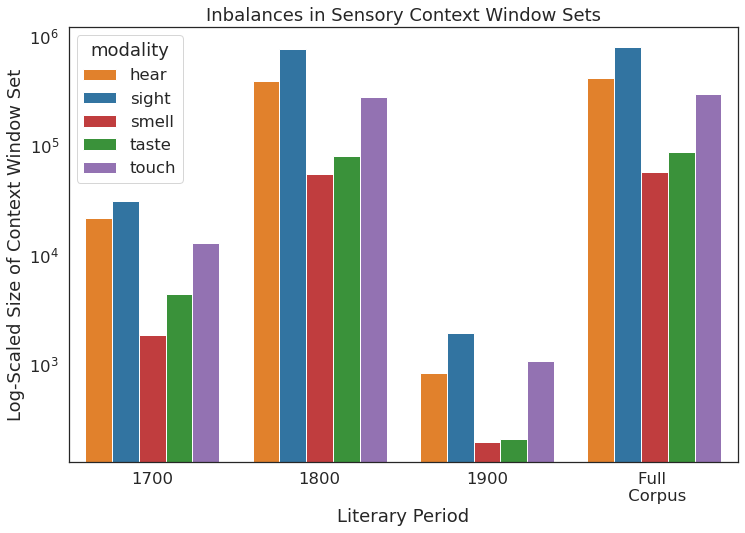

In [45]:
pal = sns.color_palette("tab10", 5)
palette = {'sight': pal.as_hex()[0], 
           'hear':  pal.as_hex()[1],
           'taste': pal.as_hex()[2],
           'smell': pal.as_hex()[3],
           'touch': pal.as_hex()[4]}

context_window_distribution = pd.DataFrame(columns = ['Period, Sense', 'period', 'modality', 'size'])
for period in PERIODS: 
    context_windows = read_file('../data/' + period + '/context_windows.pickle')
    for sense in SENSES:
        if period == "full_corpus":
            period = "Full \n Corpus"
        context_window_distribution = context_window_distribution.append({'Period, Sense':str(period) + ", \n " + sense,
                                                                          'period':period,
                                                                          'modality' : sense,
                                                                          'size' : len(context_windows[sense])} , ignore_index = True)
grouped_size = context_window_distribution.groupby(['Period, Sense']).sum().reset_index()
grouped_size['normalized_size'] = normalize([list(grouped_size['size'])])[0]


sns.set(rc = {'figure.figsize':(12,8)}, font_scale = 1.5)
sns.set_style(style='white')
plot = sns.barplot(data = grouped_size, x = 'period', y = 'size', hue = 'modality', palette = palette)
plt.title("Inbalances in Sensory Context Window Sets")

ax = plt.gca()
ax.set(yscale="log")
plt.ylabel("Log-Scaled Size of Context Window Set")
plt.xlabel("Literary Period")
plt.savefig('../visuals/size_of_context_windows.pdf', dpi=300)

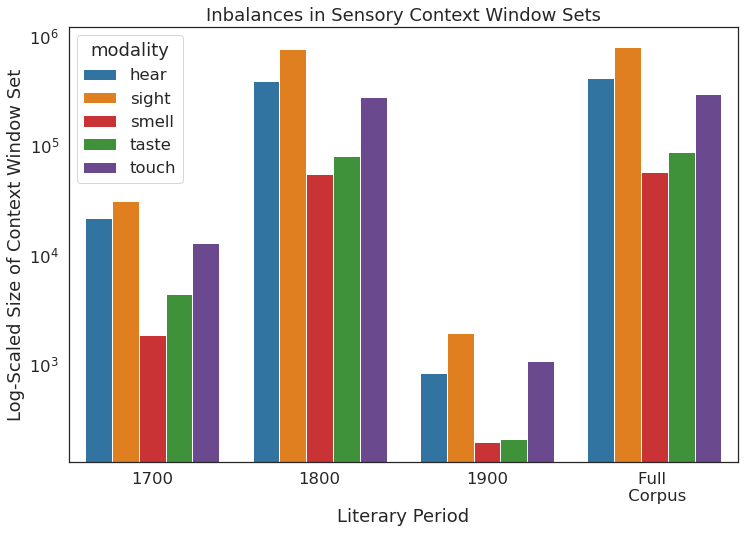

In [46]:
pal = sns.color_palette("Paired",)
palette = {'sight': pal.as_hex()[7], 
           'hear':  pal.as_hex()[1],
           'taste': pal.as_hex()[3],
           'smell': pal.as_hex()[5],
           'touch': pal.as_hex()[9]}

context_window_distribution = pd.DataFrame(columns = ['Period, Sense', 'period', 'modality', 'size'])
for period in PERIODS: 
    context_windows = read_file('../data/' + period + '/context_windows.pickle')
    for sense in SENSES:
        if period == "full_corpus":
            period = "Full \n Corpus"
        context_window_distribution = context_window_distribution.append({'Period, Sense':str(period) + ", \n " + sense,
                                                                          'period':period,
                                                                          'modality' : sense,
                                                                          'size' : len(context_windows[sense])} , ignore_index = True)
grouped_size = context_window_distribution.groupby(['Period, Sense']).sum().reset_index()
grouped_size['normalized_size'] = normalize([list(grouped_size['size'])])[0]


sns.set(rc = {'figure.figsize':(12,8)}, font_scale = 1.5)
sns.set_style(style='white')
plot = sns.barplot(data = grouped_size, x = 'period', y = 'size', hue = 'modality', palette = palette)
plt.title("Inbalances in Sensory Context Window Sets")

ax = plt.gca()
ax.set(yscale="log")
plt.ylabel("Log-Scaled Size of Context Window Set")
plt.xlabel("Literary Period")
plt.savefig('../visuals/size_of_context_windows.pdf', dpi=300)

## PAI Graphs

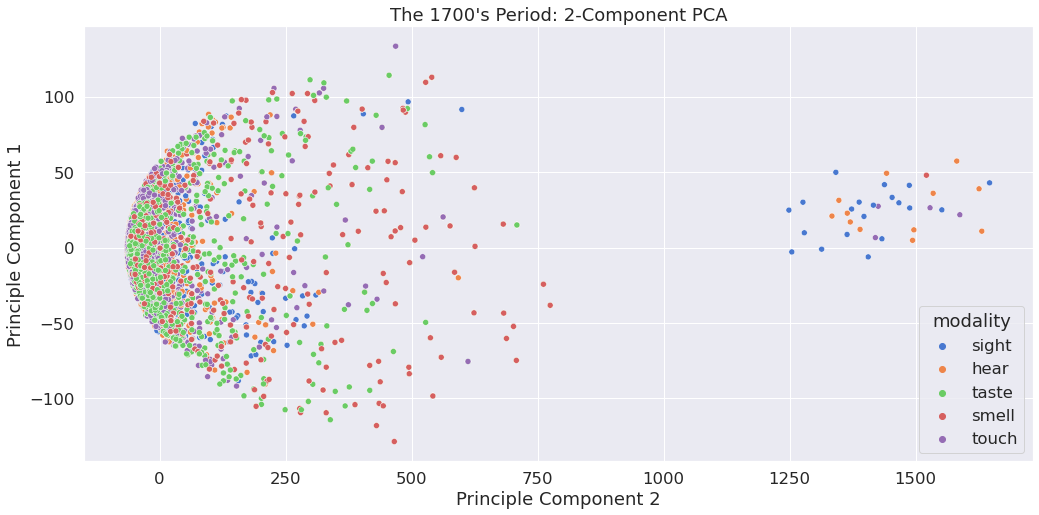

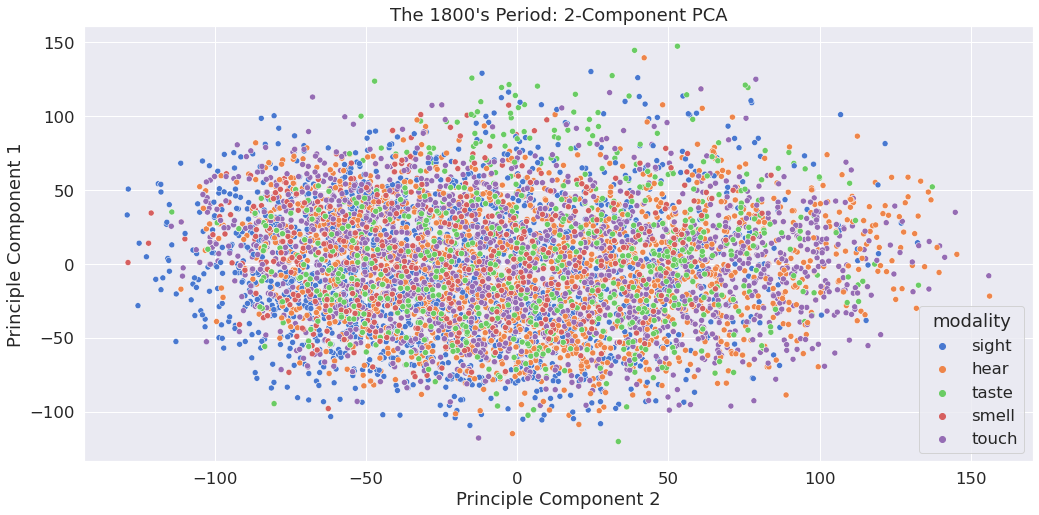

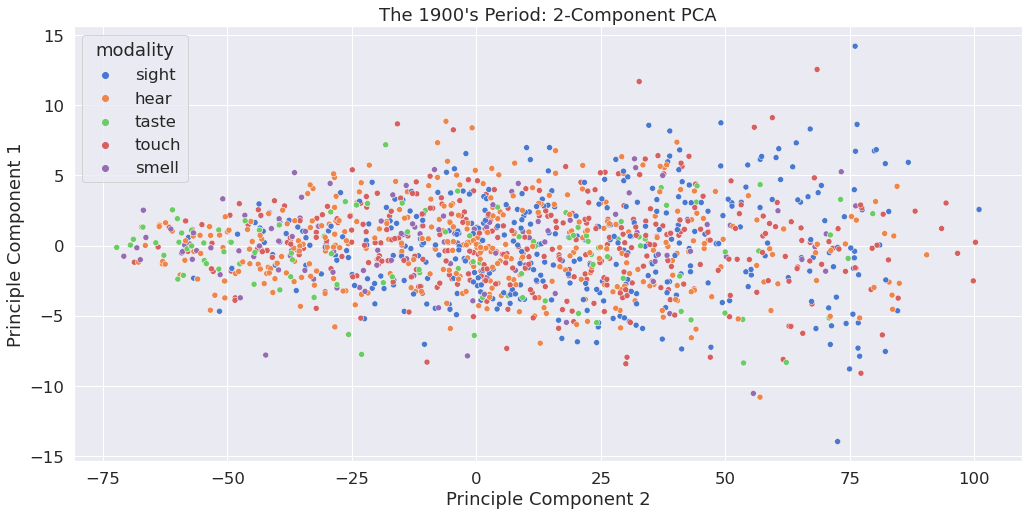

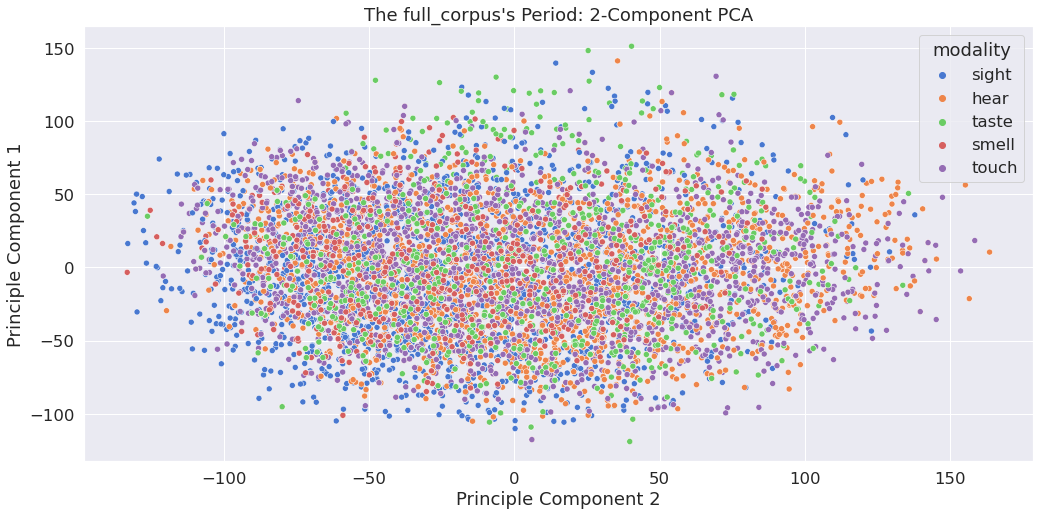

In [92]:
for period in PERIODS: 
    all_top_descriptors = read_file('../data/' + period + '/' + period + '_all_top_descriptors_0_PAI_None.pickle')
    
    sns.set(rc = {'figure.figsize':(17,8)}, font_scale = 1.5)
    
    plot = sns.scatterplot(data = all_top_descriptors, x = 'Principal Component 1', y = 'Principal Component 2', hue = 'modality')
    plt.title("The " + period + "'s Period: 2-Component PCA")

    ax = plt.gca()
    plt.ylabel("Principle Component 1")
    plt.xlabel("Principle Component 2")
    plt.show()
#     plt.savefig('../visuals/PAI_500.pdf, dpi=300)

In [ ]:
for period in PERIODS: 
    descriptor_path = '../data/' + period + '/descriptors.pickle'
    descriptors = read_file(descriptor_path)
    
    descriptor_count_df = pd.DataFrame(columns=['modality', 'descriptor', 'count'])
    for modality in SENSES:
        descriptor_dict = descriptors[modality]
        
#         print("Average count in " + modality + " " +  str(statistics.mean(descriptor_dict.values())))
#         print("Median count in " + modality + " " +  str(statistics.median(descriptor_dict.values())))
        
        descriptor_list = [[modality, word, count] for word, count in descriptor_dict.items()]
        descriptor_count_df = descriptor_count_df.append(pd.DataFrame(descriptor_list, columns = ['modality', 'descriptor', 'count']))
        descriptor_count_df = descriptor_count_df.reset_index(drop=True)
#     fig = px.box(descriptor_count_df, x="modality", y="count", points = False)
#     fig.show()